In [0]:
%sh
/databricks/python3/bin/python -m pip install --upgrade pip
%pip install graphviz

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
/bin/bash: line 1: fg: no job control


In [0]:
%pip install dtreeviz

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import os 

import numpy as np
import pandas as pd
from scipy import ndimage
from matplotlib import pyplot as plt
from pandas.core.computation.check import NUMEXPR_INSTALLED
import glob
import re
from pathlib import Path
import seaborn as sns

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [0]:
path_data = r'/dbfs/mnt/rniRaw/SN/STA/data/sta_matrix_raw.txt'
path_curated = r'/dbfs/mnt/rniCurated/SN/STA/'
path_res_all = r'/dbfs/mnt/rniProduced/SN/STA/res_all'
path_res_by_cluster = r'/dbfs/mnt/rniProduced/SN/STA/res_by_cluster'

In [0]:
palette_spc = sns.color_palette("Spectral",n_colors=16)
palette_spc.reverse()
palette = sns.color_palette([palette_spc[0], palette_spc[3], palette_spc[10], palette_spc[-3]])
palette

In [0]:
df=pd.read_csv(os.path.join(path_curated, "df_final_analysis.txt"),sep="\t",header=0)
pd.reset_option("display.max_rows")
df

,pds_code,General|Category no empty cell/not merged,General|Product type no empty cell/not merged,General|Subcategory no empty cell/not merged,Emulsifier and oil|Ratio total oil/emulsifier,Emulsifier and oil|Phospholipids g/100mL,Total Lipids g/100g product,FA_Sat g/100gFA,FA_Mono unsat g/100gFA,FA_Poly unsatg/100gFA,Pasteurization homo|P Pasto/homo bar,Pasteurization homo|T°C Pasto/Homo,Pasteurization|T°C Pasto,Pasteurization|Time Pasto sec,Sterilization US homo|P Sterilization US bar,Sterilization US homo|T°C Steril US,SterilizationDS homo|P Steril DS,SterilizationDS homo|T°C Steril DS,Sterilization|Direct/indirect Ste,Sterilization|F0,Sterilization|T°C Steril,Sterilization|Time Ste sec,Protein|Type of protein,Protein|intact / hydrolysate/am acids,"Protein|Prot level Nx6,25 g/100g product","Protein|casein Nx6,25g/100g product","Protein|whey protNx6,25g/100g product","Protein|SOY prot g/100g productNx6,25","Protein|PEA prot g/100g productNx6,25",Protein|Content kg/L,Stabilizers thickners|Type,Stabilizers thickners|Amount kg/1000L,Calcium minerals|Ca levelg/100g,Product KPI at T=0 |dry matter g/100g,Product KPI at T=0 |pH / Acidity,Product KPI at T=0 |Viscosity mPas,target,Emulsifier and oil|Emulsifier_Citrem LIQUID E472c,Emulsifier and oil|Emulsifier_Citrem POWDER E472c,Emulsifier and oil|Emulsifier_DIMODAN E471,...,Polysaccharides_Starch,Polysaccharides_Sucrose,Polysaccharides_Sugar,Polysaccharides_total_amount,Protein_Calcium caseinates,Protein_Casein hydrolysate,Protein_Concentrated skimmed milk,Protein_Demineralized whey permeate 125% protein ORGANIC,Protein_Demineralized whey permeate 90,Protein_IP LQD DCI 12% No premix UF,Protein_IP PWD HYDR ACID WHEY,Protein_LIsoleucine,Protein_LLeucine,Protein_LValine,Protein_Lactofidus BP POF P1,Protein_Milk Casein Isolate,Protein_Milk Protein Concentrate,Protein_Milk Protein Isolate,Protein_Milk minerals concentrates,Protein_Pea protein,Protein_Pea protein isolate,Protein_Pepti permeate,Protein_Potassium caseinate,Protein_Skimmed milk Liquid,Protein_Skimmed milk Powder ORGANIC,Protein_Sodium caseinate,Protein_Soy protein isolate,Protein_WPC,Protein_WPC80 Native,Protein_WPC80 Native low Lactose,Protein_WPC83 Native,Protein_WPI Acid,Protein_WPI Native,Protein_WPI neutralized,Protein_WPI sweet,Protein_Whey protein hydrolysate,Protein_Whey rich in milk calcium,Protein_Yoghurt powder,Protein_whey protein hydrolysate,Protein_total_amount
0,10103262,Adult ONS,CUBITAN,NaN,30.882353,NaN,3.225499,14.388776,57.052004,28.559220,550+50,60,95.0,30.0,NaN,NaN,100+0,60.0,Indirect,15.561806,127.0,240.0,Dairy,Intact,9.634344,NaN,NaN,NaN,NaN,8.850000,NaN,NaN,0.207374,27.087772,6.70,40.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.249377,240.600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.100
1,10103271,Adult ONS,CUBITAN,NaN,31.142857,NaN,1.255000,12.616000,57.950000,29.434000,550+50,60,95.0,30.0,NaN,NaN,100+0,60.0,Indirect,15.561806,127.0,240.0,Dairy,Intact,3.577000,2.155,0.538719,0.000037,0.000000,8.810000,NaN,NaN,NaN,NaN,6.80,15.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.321668,155.440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.700
2,10103278,Tube,PEPTISON MARS,NaN,NaN,NaN,1.548203,58.257486,12.068911,29.673604,250+50,60,80.0,0.0,NaN,NaN,100+0,60.0,Indirect,0.039089,101.0,240.0,Dairy,Hydrolyzed,3.625735,NaN,3.596682,NaN,NaN,NaN,Modified starch,20.0,0.073756,22.688308,4.00,8.0,3.0,NaN,NaN,NaN,...,0.0,0.0,0.000000,215.177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,48.000
3,10103281,Adult ONS,CUBITAN,NaN,31.142857,NaN,1.369000,17.854000,54.973000,27.172000,550+50,60,95.0,30.0,NaN,NaN,100+0,60.0,Indirect,15.561806,127.0,240.0,Dairy,Intact,10.004000,7.295,1.824000,0.000037,0.000000,8.810000,NaN,NaN,NaN,NaN,6.8

In [0]:
df[df["Total Lipids g/100g product"] == 50]  # outlier product: very high total lipid, no protein
df = df[df["Total Lipids g/100g product"] != 50]

## dtype transformation for model training

In [0]:
# manual correction. to be corrected at the data collection step!!!

df.loc[:, "Pasteurization  homo|T°C Pasto/Homo"] = pd.to_numeric(df["Pasteurization  homo|T°C Pasto/Homo"].replace("72-75", '73'))
df.loc[:, "SterilizationDS homo|P Steril DS"] = df["SterilizationDS homo|P Steril DS"].replace(">180", '181')


<command-2533285189213623>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Pasteurization  homo|T°C Pasto/Homo"] = pd.to_numeric(df["Pasteurization  homo|T°C Pasto/Homo"].replace("72-75", '73'))
<command-2533285189213623>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "SterilizationDS homo|P Steril DS"] = df["SterilizationDS homo|P Steril DS"].replace(">180", '181')


In [0]:
df["target"]=pd.Categorical(df.target)
df[["target"]].value_counts()

<command-3173362489925703>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"]=pd.Categorical(df.target)


Out[7]: target
2.0       59
1.0       36
3.0       30
4.0        4
dtype: int64

In [0]:
# check cols of dtype "object"
df.loc[:, df.dtypes==object].head().transpose()

,0,1,2,3,4
pds_code,10103262,10103271,10103278,10103281,10103290
General|Category no empty cell/not merged,Adult ONS,Adult ONS,Tube,Adult ONS,Adult ONS
General|Product type no empty cell/not merged,CUBITAN,CUBITAN,PEPTISON MARS,CUBITAN,FORTIMEL
General|Subcategory no empty cell/not merged,NaN,NaN,NaN,NaN,NaN
Pasteurization homo|P Pasto/homo bar,550+50,550+50,250+50,550+50,550+50
Sterilization US homo|P Sterilization US bar,NaN,NaN,NaN,NaN,NaN
SterilizationDS homo|P Steril DS,100+0,100+0,100+0,100+0,100+0
Sterilization|Direct/indirect Ste,Indirect,Indirect,Indirect,Indirect,Indirect
Protein|Type of protein,Dairy,Dairy,Dairy,Dairy,Dairy
Protein|intact / hydrolysate/am acids,Intact,Intact,Hydrolyzed,Intact,Intact


In [0]:
def split_plus_to_numeric(df, column_to_split, remove_origin=True):
    df[[column_to_split + ' first', column_to_split + ' second']] = df[column_to_split].str.split('+', expand=True).apply(pd.to_numeric)
    df.drop(column_to_split, axis=1, inplace=True)
    return df

In [0]:
col_to_split = ["Pasteurization  homo|P Pasto/homo bar", "Sterilization US homo|P Sterilization US bar", "SterilizationDS homo|P Steril DS"]
for col in col_to_split:
    print(f"\t----- {col} -----")
    print("\nbefore split:\n", df[col].value_counts(), "\n\n")
    df = split_plus_to_numeric(df, col)
    print("after split:\n", df[col + ' first'].value_counts(), "\n", df[col + ' second'].value_counts(), "\n\n")

	----- Pasteurization  homo|P Pasto/homo bar -----

before split:
 550+50      29
400+50      20
250+50      15
200+50       7
50+100       5
450+50       4
220+30       3
150+50       2
260+30       2
250 + 50     2
180+50       2
250+30       1
230+40       1
300+50       1
325+50       1
350+50       1
Name: Pasteurization  homo|P Pasto/homo bar, dtype: int64 


after split:
 550.0    29
400.0    20
250.0    18
200.0     7
50.0      5
450.0     4
220.0     3
150.0     2
260.0     2
180.0     2
230.0     1
300.0     1
325.0     1
350.0     1
Name: Pasteurization  homo|P Pasto/homo bar first, dtype: int64 
 50.0     84
30.0      6
100.0     5
40.0      1
Name: Pasteurization  homo|P Pasto/homo bar second, dtype: int64 


	----- Sterilization US homo|P Sterilization US bar -----

before split:
 250+50      5
250 + 50    4
Name: Sterilization US homo|P Sterilization US bar, dtype: int64 


after split:
 250.0    9
Name: Sterilization US homo|P Sterilization US bar first, dtype: int64 
 

<command-2533285189213746>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[column_to_split + ' first', column_to_split + ' second']] = df[column_to_split].str.split('+', expand=True).apply(pd.to_numeric)
<command-2533285189213746>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[column_to_split + ' first', column_to_split + ' second']] = df[column_to_split].str.split('+', expand=True).apply(pd.to_numeric)
<command-2533285189213746>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 129
Columns: 121 entries, pds_code to SterilizationDS homo|P Steril DS second
dtypes: category(1), float64(112), object(8)
memory usage: 122.3+ KB


## make clusters

In [0]:
# table of filters for clusters
df_filters = pd.DataFrame(columns=["name", "criteria_col", "col_value"])
df_filters.loc[len(df_filters.index)] = ["category_imf", "General|Category no empty cell/not merged", "Core Milks"]
df_filters.loc[len(df_filters.index)] = ["protein_type_intact", "Protein|intact / hydrolysate/am acids", "Intact"]
df_filters.loc[len(df_filters.index)] = ["protein_type_hydrolyzed", "Protein|intact / hydrolysate/am acids", "Hydrolyzed"]
df_filters.set_index('name', inplace=True)
df_filters


,criteria_col,col_value
name,,
category_imf,General|Category no empty cell/not merged,Core Milks
protein_type_intact,Protein|intact / hydrolysate/am acids,Intact
protein_type_hydrolyzed,Protein|intact / hydrolysate/am acids,Hydrolyzed


In [0]:
def get_cluster(df, cluster_name):
    criteria_col = df_filters.loc[cluster_name, "criteria_col"]
    col_value = df_filters.loc[cluster_name, "col_value"]
    path_res = os.path.join(path_res_by_cluster, cluster_name)
    if not os.path.exists(path_res):
        os.makedirs(path_res)

    df_cluster = df[df[criteria_col] == col_value]
    return df_cluster, path_res

In [0]:
def make_category_plots(df, path_res):
    if not os.path.exists(os.path.join(path_res, "category_plot")):
        os.makedirs(os.path.join(path_res, "category_plot"))

        
    count_obj = 0
    for x in df.columns:
        if x not in ["pds_code","target"] and df[[x]].dtypes[0]=="object":
            print(x)
            #x="Category no empty cell/not merged"
            #print(x.replace('/| ',""))
            name_x=x
            for character in '!?/|':
                name_x = name_x.replace(character, ' ')
            #print(name_x)
            sns_plot = sns.countplot(data=df, x=x,  hue="target", palette=palette)
            plt.xticks(rotation=30)
            fig = sns_plot.get_figure()
            fig.savefig(os.path.join(path_res, "category_plot/countplot_"+name_x
            +".png"), dpi=100, bbox_inches='tight')
            fig.clf()
            count_obj += 1
    print("number of columns of dtype 'object':", count_obj)


In [0]:
def make_boxplots(df, path_res):
    if not os.path.exists(os.path.join(path_res, "boxplot")):
        os.makedirs(os.path.join(path_res, "boxplot"))
    count_float = 0
    for x in df.columns:
        if x not in ["pds_code","target"] and df[[x]].dtypes[0]=="float64":
            #x="Category no empty cell/not merged"
            #print(x.replace('/| ',""))
            name_x=x
            for character in '!?/|:':
                name_x = name_x.replace(character, ' ')
            print(x, '\t', name_x)
            sns_plot = sns.boxplot(data=df,x=x, y="target", palette=palette)
            plt.xticks(rotation=30)        
            fig = sns_plot.get_figure()
            fig.savefig(os.path.join(path_res, "boxplot/boxplot_"+name_x
            +".png"), dpi=100, bbox_inches='tight')
            fig.clf()
            count_float += 1
    print("number of columns of dtype 'float64':", count_float)


In [0]:
# df["Total Lipids g/100g product"]= df["Total Lipids g/100g product"].astype(float)
# # df_compare = df.dropna(subset=["Total Lipids g/100g product",'Protein|Type of protein'])
# df_compare = df[df["Protein|Type of protein"] != 'Not applicable']
# sns_plot = sns.boxplot(data=df_compare,x="Total Lipids g/100g product", y="Protein|Type of protein",hue="target", palette = palette)
# fig = sns_plot.get_figure()
# fig.savefig(os.path.join(path_res, "pairplot_totallipid_typeprotein.png"),dpi=100, bbox_inches='tight')

In [0]:
# sns_plot =sns.scatterplot(data=df,x="Total Lipids g/100g product", y="FA_Sat g/100gFA",hue="target", palette = palette)
# fig = sns_plot.get_figure()
# fig.savefig(os.path.join(path_res, "scatterplot_totallipid_FA_Saturated.png"),dpi=100, bbox_inches='tight')

In [0]:
# sns.scatterplot(data=df, x='Oil_total_amount', y='Total Lipids g/100g product')

In [0]:
def make_pairplots(df, path_res, cluster_name):
    lst_col_total_amount = ['Stabilizers  thickners|Amount kg/1000L', 'Emulsifier_total_amount', 'Oil_total_amount', 'Polysaccharides_total_amount', 'Protein_total_amount']
    df_total_amount = df[lst_col_total_amount + ['target']]
    df_total_amount.rename(columns={'Stabilizers  thickners|Amount kg/1000L': 'stabilizers_amount'}, inplace=True)        
    plt.rcParams['figure.figsize'] = (25, 20)
    sns_plot = sns.pairplot(df_total_amount, hue='target', palette=palette)
    plt.savefig(os.path.join(path_res, f"pairplot_total_amount_{cluster_name}.png"),dpi=100, bbox_inches='tight')
    plt.clf()
    # normalized total amounts
    df_total_amount_val = df_total_amount.drop('target', axis=1)
    df_total_amount_norm = df_total_amount_val.div(df_total_amount_val.sum(axis=1), axis=0)
    df_total_amount_norm['target'] = df_total_amount['target']
    sns.pairplot(df_total_amount_norm, hue='target', palette=palette)
    plt.savefig(os.path.join(path_res, f"pairplot_total_amount_normalized_{cluster_name}.png"),dpi=100, bbox_inches='tight')
    plt.clf()

In [0]:
from sklearn.preprocessing import OneHotEncoder

def process_data(df):
    y = df["target"]
    X = df.drop(["pds_code", "target"], axis=1)
    # numeric features
    X_num = X.select_dtypes(include='number')
    X_num.fillna(0, inplace=True)
    # categorical features
    X_obj = X.select_dtypes(include='object')
    enc = OneHotEncoder(handle_unknown='ignore')
    X_obj_onehot = enc.fit_transform(X_obj)
    X_obj_onehot = enc.transform(X_obj).toarray()
    X_obj_onehot_name = enc.get_feature_names_out(X_obj.columns)
    df_X_obj_onehot = pd.DataFrame(X_obj_onehot, columns=X_obj_onehot_name, index = X.index)
    X_enc = X.drop(X_obj.columns, axis=1)
    X_enc = pd.concat([X_enc, df_X_obj_onehot], axis=1)
    # feature combination
    X_final = X_enc.fillna(0)
    return X_final, y

In [0]:
def decision_tree_train_pred(X_final, y):
    print("decision tree classifier training... ")
    clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=123)
    clf.fit(X_final, y)
    pred = clf.predict(X_final)
    print("accuracy_score =", accuracy_score(y, pred))
    return clf

In [0]:
from sklearn.tree import DecisionTreeRegressor
def decision_tree_reg_train_pred(X_final, y):
    print("decision tree regressor training... ")
    regr = DecisionTreeRegressor(max_depth=4,random_state=123)
    regr.fit(X_final, y)
    pred = regr.predict(X_final)
    print("accuracy_score =", accuracy_score(y, pred))
    return regr

In [0]:
def decision_tree_viz(model, X_final, y, path_res, cluster_name):
    # text_representation = tree.export_text(model)
    y_for_viz = y.unique().sort_values(ascending=True).astype(str).tolist()
    print(y_for_viz)
    fig = plt.figure(figsize=(34, 18))
    plot_tree(model, 
              feature_names=X_final.columns,  
              class_names=y_for_viz,
              filled=True,
              fontsize=12
              )
    plt.title(f"Decision tree for stability of {cluster_name} products", size=14)
    fig.savefig(os.path.join(path_res, f"decision_tree_{cluster_name}.png"))
    fig.clf()
    
    # y_for_viz = pd.to_numeric(y) - 1
    # viz_model = dtreeviz.model(model,
    #                        X_train=X_final, y_train=y_for_viz,
    #                        feature_names=X_final.columns,
    #                        target_name='stability score',
    #                        class_names=[0, 1, 2])
    # print("check")
    # v = viz_model.view()     # render as SVG into internal object 
    # v.show()                 # pop up window
    # v.save(os.path.join(path_res, "decision_tree_viz.svg"))  # optionally save as svg


    # dot_data = tree.export_graphviz(model, out_file=None, 
    #                             feature_names=X_final.columns, 
    #                             class_names=['1', '2', '3', '4'], 
    #                             filled=True, 
    #                             rounded=True) 
    # graph = graphviz.Source(dot_data) 
    # graph.render(os.path.join(path_res, "decision_tree"))

    # get the importance figure

def feature_importance_chart(model, X_final, path_res, cluster_name, num_prod):
    importance = model.feature_importances_
    df_importance = pd.DataFrame(importance, index=X_final.columns)
    df_importance.sort_values(by=[0], ascending=False, inplace=True)
    plt.rcParams['figure.figsize'] = (6, 6)   
    sns_plot = sns.barplot(data=df_importance[:10].transpose(), orient='h')
    plt.xticks(fontsize=12) 
    plt.yticks(fontsize=12)
    plt.title(f"Feature importance for stability of {num_prod} {cluster_name} products", size=18, loc='right')
    fig = sns_plot.get_figure()
    fig.savefig(os.path.join(path_res, f"feature_importance_{cluster_name}.png"), bbox_inches='tight')
    fig.clf()


# Modeling

### on all the products

In [0]:
path_res = path_res_all
make_pairplots(df, path_res, 'all')
X, y = process_data(df)
print(y.unique().tolist())
clf = decision_tree_train_pred(X, y)
decision_tree_viz(clf, X, y, path_res, 'all')
feature_importance_chart(clf, X, path_res, 'all', len(df))

<command-3173362489925718>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_amount.rename(columns={'Stabilizers  thickners|Amount kg/1000L': 'stabilizers_amount'}, inplace=True)


[2.0, 3.0, 1.0, 4.0]
decision tree classifier training... 
accuracy_score = 0.8449612403100775
['1.0', '2.0', '3.0', '4.0']
<Figure size 951.875x900 with 0 Axes><Figure size 951.875x900 with 0 Axes><Figure size 2448x1296 with 0 Axes>

In [0]:
X.dtypes.value_counts()

Out[25]: float64    239
dtype: int64

In [0]:
X = df.drop(["pds_code", "target"], axis=1)
# numeric features
X_num = X.select_dtypes(include='number')
X_num.fillna(0, inplace=True)
y_num = pd.to_numeric(y)
regr = DecisionTreeRegressor(max_depth=4,random_state=123)
regr.fit(X_num, y_num)




Out[26]: DecisionTreeRegressor(max_depth=4, random_state=123)

In [0]:
# pred = regr.predict(X_num)
pred = pred.round(0)
pred
print("accuracy_score =", accuracy_score(y_num, pred))

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2533285189213852>:2
      1 # pred = regr.predict(X_num)
----> 2 pred = pred.round(0)
      3 pred
      4 print("accuracy_score =", accuracy_score(y_num, pred))

NameError: name 'pred' is not defined

['1.0', '2.0', '3.0', '4.0']
Out[28]: [Text(0.6071428571428571, 0.9, 'Pasteurization  homo|P Pasto/homo bar first <= 500.0\nsquared_error = 0.635\nsamples = 129\nvalue = 2.016'),
 Text(0.35714285714285715, 0.7, 'Protein_Pea protein isolate <= 0.268\nsquared_error = 0.517\nsamples = 100\nvalue = 2.23'),
 Text(0.2857142857142857, 0.5, 'Calcium minerals|Ca levelg/100g <= 0.109\nsquared_error = 0.433\nsamples = 97\nvalue = 2.175'),
 Text(0.14285714285714285, 0.3, 'FA_Sat g/100gFA <= 74.764\nsquared_error = 0.366\nsamples = 84\nvalue = 2.06'),
 Text(0.07142857142857142, 0.1, 'squared_error = 0.313\nsamples = 79\nvalue = 2.127'),
 Text(0.21428571428571427, 0.1, 'squared_error = 0.0\nsamples = 5\nvalue = 1.0'),
 Text(0.42857142857142855, 0.3, 'Polysaccharides_Liquid maltodextrin <= 0.299\nsquared_error = 0.225\nsamples = 13\nvalue = 2.923'),
 Text(0.35714285714285715, 0.1, 'squared_error = 0.083\nsamples = 11\nvalue = 3.091'),
 Text(0.5, 0.1, 'squared_error = 0.0\nsamples = 2\nvalue = 2.0'),


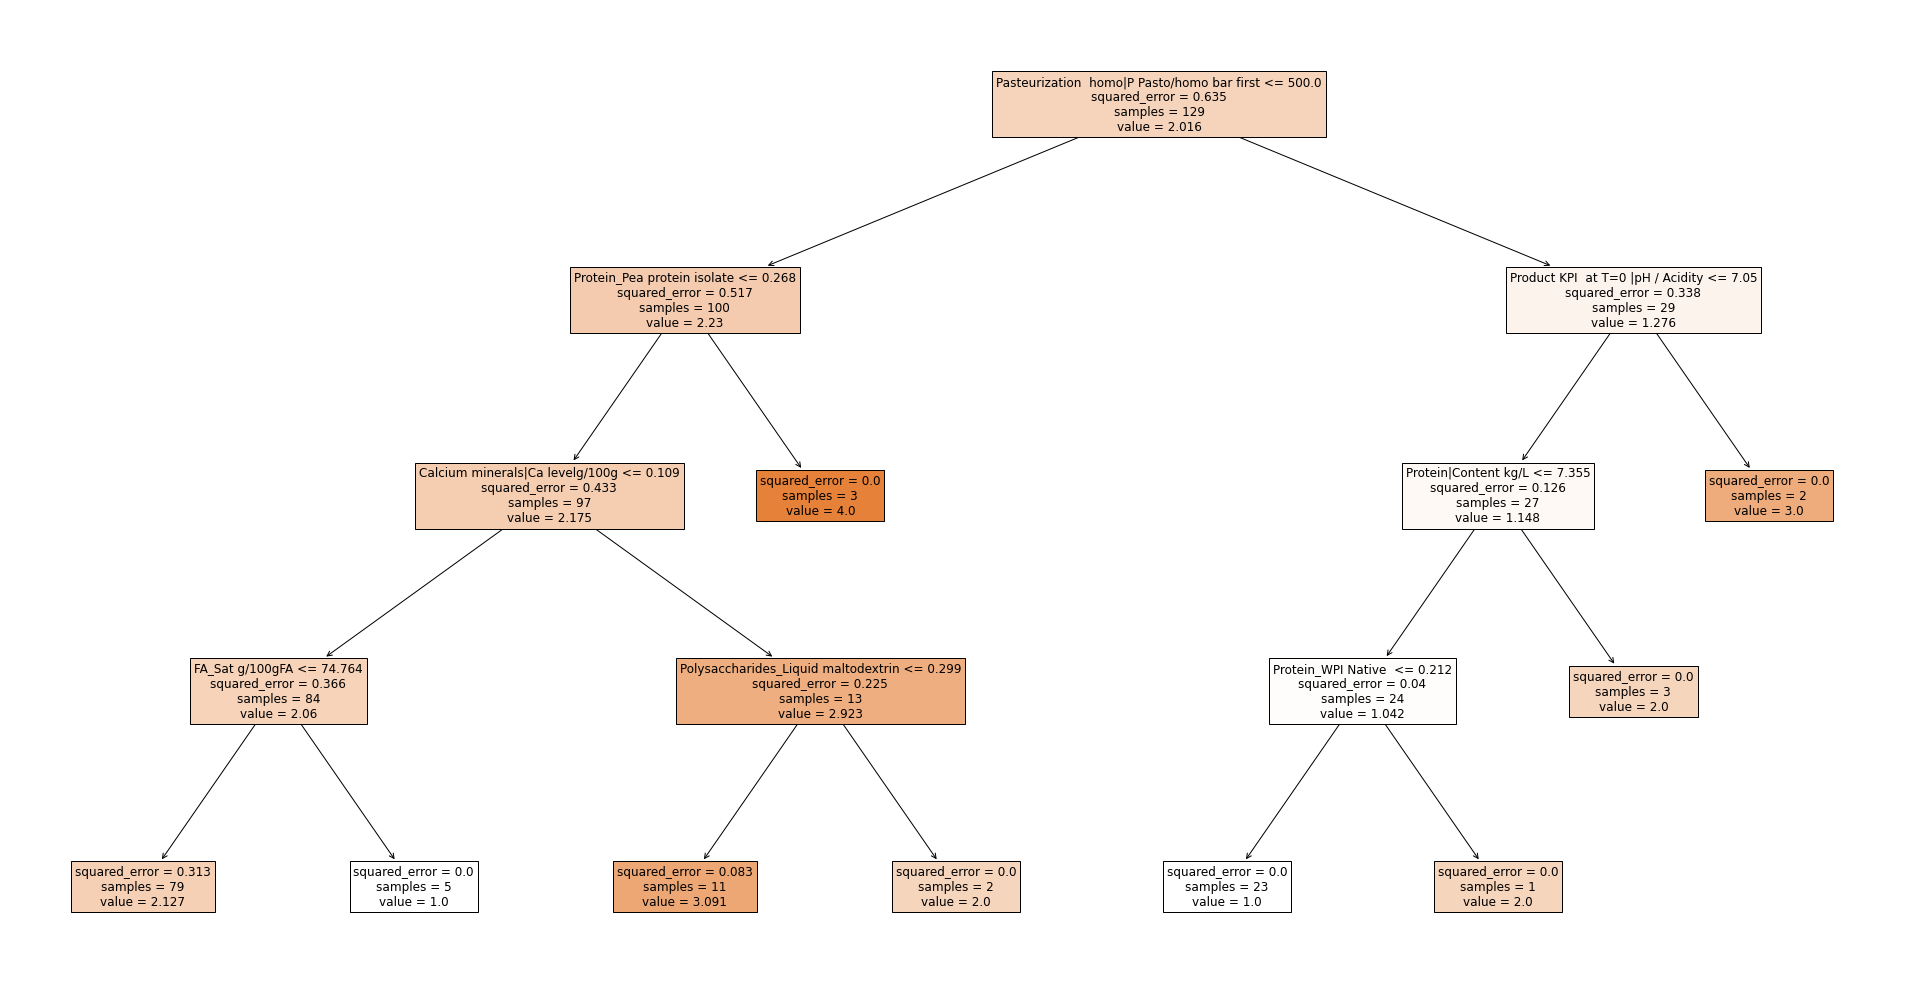

In [0]:
y_for_viz = y.unique().sort_values(ascending=True).astype(str).tolist()
print(y_for_viz)
fig = plt.figure(figsize=(34, 18))
plot_tree(regr, 
            feature_names=X_num.columns,  
            class_names=y_num,
            filled=True,
            fontsize=12
            )
# plt.title(f"Decision tree for stability of {cluster_name} products", size=14)
# fig.savefig(os.path.join(path_res, f"decision_tree_{cluster_name}.png"))
# fig.clf()

In [0]:
X_num.columns

Out[33]: Index(['Emulsifier and oil|Ratio total oil/emulsifier',
       'Emulsifier and oil|Phospholipids g/100mL',
       'Total Lipids g/100g product', 'FA_Sat g/100gFA',
       'FA_Mono unsat g/100gFA', 'FA_Poly unsatg/100gFA',
       'Pasteurization  homo|T°C Pasto/Homo', 'Pasteurization|T°C Pasto',
       'Pasteurization|Time Pasto sec', 'Sterilization US homo|T°C Steril US',
       ...
       'Protein_Whey rich in milk calcium', 'Protein_Yoghurt powder',
       'Protein_whey protein hydrolysate', 'Protein_total_amount',
       'Pasteurization  homo|P Pasto/homo bar first',
       'Pasteurization  homo|P Pasto/homo bar second',
       'Sterilization US homo|P Sterilization US bar first',
       'Sterilization US homo|P Sterilization US bar second',
       'SterilizationDS homo|P Steril DS first',
       'SterilizationDS homo|P Steril DS second'],
      dtype='object', length=112)

In [0]:
import dtreeviz 

viz = dtreeviz.model(regr, X_num, y_num,
                target_name="target",
                feature_names=X_num.columns)
viz.view()


/databricks/python/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


<Figure size 432x432 with 0 Axes>

In [0]:
v = viz.view()
v.save(os.path.join(path_res, "decision_tree_reg_all.svg"))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-51535c33-8fdc-47b2-b860-5965d621034b/lib/python3.9/site-packages/graphviz/backend/execute.py", line 81, in run_check
    proc = subprocess.run(cmd, **kwargs)
  File "/usr/lib/python3.9/subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "/usr/lib/python3.9/subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/usr/lib/python3.9/subprocess.py", line 1821, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)
FileNotFoundError: [Errno 2] No such file or directory: 'dot'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<command-2533285189213854>", line 2, 

In [0]:
os.environ["PATH"]
# os.listdir(os.environ["PATH"])


Out[64]: '/local_disk0/.ephemeral_nfs/envs/pythonEnv-51535c33-8fdc-47b2-b860-5965d621034b/bin:/local_disk0/.ephemeral_nfs/cluster_libraries/python/bin:/databricks/.pyenv/bin:/usr/local/nvidia/bin:/databricks/python3/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/snap/bin'

In [0]:
os.listdir("/local_disk0/.ephemeral_nfs/envs/pythonEnv-51535c33-8fdc-47b2-b860-5965d621034b/lib/python3.9/site-packages/")

Out[69]: ['dtreeviz',
 '_pytest',
 'pip-21.2.4.dist-info',
 'dtreeviz-2.2.2.dist-info',
 'exceptiongroup',
 '__pycache__',
 'pip',
 'colour.py',
 'colour-0.1.5.dist-info',
 'iniconfig',
 'pytest',
 'graphviz-0.20.1.dist-info',
 'graphviz',
 'testing',
 'exceptiongroup-1.1.3.dist-info',
 'pytest-7.4.0.dist-info',
 'iniconfig-2.0.0.dist-info',
 'pip-21.2.4.virtualenv',
 '_virtualenv.py',
 '_virtualenv.pth',
 'py.py',
 'sites.pth']

In [0]:
os.environ["PATH"]

Out[68]: '/local_disk0/.ephemeral_nfs/envs/pythonEnv-51535c33-8fdc-47b2-b860-5965d621034b/bin:/local_disk0/.ephemeral_nfs/cluster_libraries/python/bin:/databricks/.pyenv/bin:/usr/local/nvidia/bin:/databricks/python3/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/snap/bin:/local_disk0/.ephemeral_nfs/envs/pythonEnv-51535c33-8fdc-47b2-b860-5965d621034b/lib/python3.9/site-packages/graphviz'

In [0]:
os.environ["PATH"] += os.pathsep + "/local_disk0/.ephemeral_nfs/envs/pythonEnv-51535c33-8fdc-47b2-b860-5965d621034b/lib/python3.9/site-packages/graphviz"

In [0]:
import graphviz
graphviz.__version__

Out[72]: '0.20.1'

### loop among the clusters

In [0]:
for cluster_name in df_filters.index:
    df_cluster, path_res = get_cluster(df, cluster_name)
    num_prod = len(df_cluster)
    print("\nnumber of products in cluster", cluster_name, ":", num_prod)
    print(df_cluster[["target"]].value_counts())

    make_pairplots(df_cluster, path_res, cluster_name)
    X, y = process_data(df_cluster)
    print(y.unique().tolist())
    model = decision_tree_train_pred(X, y)
    decision_tree_viz(model, X, y, path_res, cluster_name)
    feature_importance_chart(model, X, path_res, cluster_name, num_prod)



number of products in cluster category_imf : 16
target
2.0       7
1.0       6
3.0       3
4.0       0
dtype: int64


<command-3173362489925718>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[2.0, 3.0, 1.0]
decision_tree_training... 
accuracy_score = 1.0
['1.0', '2.0', '3.0']

number of products in cluster protein_type_intact : 118
target
2.0       57
1.0       34
3.0       23
4.0        4
dtype: int64


<command-3173362489925718>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[2.0, 1.0, 3.0, 4.0]
decision_tree_training... 
accuracy_score = 0.9152542372881356
['1.0', '2.0', '3.0', '4.0']

number of products in cluster protein_type_hydrolyzed : 8
target
3.0       6
2.0       2
1.0       0
4.0       0
dtype: int64


<command-3173362489925718>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[3.0, 2.0]
decision_tree_training... 
accuracy_score = 1.0
['2.0', '3.0']
<Figure size 951.875x900 with 0 Axes><Figure size 951.875x900 with 0 Axes><Figure size 1080x720 with 0 Axes><Figure size 951.875x900 with 0 Axes><Figure size 951.875x900 with 0 Axes><Figure size 1080x720 with 0 Axes><Figure size 951.875x900 with 0 Axes><Figure size 951.875x900 with 0 Axes><Figure size 1080x720 with 0 Axes>

In [0]:
# from sklearn.feature_selection import VarianceThreshold
# sel = VarianceThreshold(threshold=1e-6)
# X_num_sel = sel.fit_transform(X_num)
# # for understanding: get and visualize the mask
# mask = sel.get_support()
# plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
# plt.xlabel('Numeric feature selection by variance');
# print("features with too low variance:", list(X_num.columns[~mask]))

In [0]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import mutual_info_regression
# sel = SelectKBest(score_func = mutual_info_regression, k=20)
# sel.fit(X_num, y)
# mask = sel.get_support()
# plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
# print("Top 20 numeric features selected:")
# for feat in list(X_num.columns[mask]):
#     print('\t', feat)
# plt.xlabel('Feature selection by mutual information ');